In [1]:
import glob
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import networkx as nx
from datetime import date, datetime

files = glob.glob('*')
print(files)

['[1] subset.ipynb', 'tvl.pkl', 'cases', 'LPdata', 'physics', 'ids_696.csv', '[0efficient] downloadSWAPparallel.ipynb', 'initial_pools', '[1B] deeper-subset.ipynb', 'LTdata.pkl', 'pools_hist.pickle', 'evol-txns-gas.png', '[0] download.ipynb', 'TxnCount_1000_pools_desc_151122.pkl']


In [2]:
"""
    Wanted pools at different points in time
"""

with open('/home/miori/Desktop/crypto/cases/saved_poolsJanJune.pkl', 'rb') as f:
    saved_poolsJanJune = pickle.load(f)
    
with open('/home/miori/Desktop/crypto/cases/saved_poolsJanMarch.pkl', 'rb') as f:
    saved_poolsJanMarch = pickle.load(f)
    
with open('/home/miori/Desktop/crypto/cases/saved_poolsAprJune.pkl', 'rb') as f:
    saved_poolsAprJune = pickle.load(f)
    
with open('/home/miori/Desktop/crypto/cases/saved_poolsJanFeb.pkl', 'rb') as f:
    saved_poolsJanFeb = pickle.load(f)
    
with open('/home/miori/Desktop/crypto/cases/saved_poolsMarApr.pkl', 'rb') as f:
    saved_poolsMarApr = pickle.load(f)
    
with open('/home/miori/Desktop/crypto/cases/saved_poolsMayJune.pkl', 'rb') as f:
    saved_poolsMayJune = pickle.load(f)

In [3]:
all_pools = saved_poolsJanJune + saved_poolsJanMarch + saved_poolsAprJune + \
            saved_poolsJanFeb + saved_poolsMarApr + saved_poolsMayJune
all_pools = np.unique(all_pools)
len(all_pools)

177

In [4]:
# All pools

pools_info = pd.read_pickle('/home/miori/Desktop/crypto/TxnCount_1000_pools_desc_151122.pkl')
pools_info = pools_info.set_index('id')
pools_info = pools_info.loc[all_pools, :]
pools_info

,feeTier,sqrtPrice,token0Price,token1Price,volumeToken0,volumeToken1,volumeUSD,txCount,liquidity,totalValueLockedToken0,...,token0_name,token0_decimals,token0_poolCount,token0_totalValueLockedUSD,token1_id,token1_symbol,token1_name,token1_decimals,token1_poolCount,token1_totalValueLockedUSD
id,,,,,,,,,,,,,,,,,,,,,
0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,500,7.920604e+22,1.000559e+00,9.994416e-01,4.931671e+08,4.931932e+08,4.931933e+08,12808.0,1.119287e+22,2.495320e+07,...,Binance USD,18,0,2.657891e+07,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,USD Coin,6,0,8.996516e+08
0x020c349a0541d76c16f501abc6b2e9c98adae892,10000,5.937884e+34,1.780311e+00,5.616997e-01,9.010528e+07,2.657561e+07,9.014392e+07,9271.0,1.047660e+17,1.193480e+06,...,USD Coin,6,0,8.996516e+08,0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f,SNX,Synthetix Network Token,18,0,1.843754e+06
0x04916039b1f59d9745bf6e0a21f191d1e0a84287,3000,1.742898e+29,2.066403e-01,4.839326e+00,1.059509e+04,1.042006e+05,3.092450e+08,18413.0,4.347989e+19,2.890096e+01,...,yearn.finance,18,0,2.931850e+05,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,Wrapped Ether,18,0,7.696633e+08
0x04a2004b2032fef2ba93f40b0e34d26ab7b00120,3000,1.694542e+35,2.186021e-01,4.574520e+00,3.172780e+07,1.674339e+08,3.172780e+07,3598.0,1.338763e+19,5.180685e+06,...,USD Coin,6,0,8.996516e+08,0xf1ca9cb74685755965c7458528a36934df52a3ef,AVINOC,AVINOC Token,18,0,1.598447e+07
0x04ca0c71eec16fd4fa9d35ac924cc33eeb4187a2,3000,1.461447e+48,2.938957e-39,3.402568e+38,5.364801e+04,8.644398e+08,1.528804e+08,34812.0,0.000000e+00,8.020706e+01,...,Wrapped Ether,18,0,7.696633e+08,0xd5d86fc8d5c0ea1ac1ac5dfab6e529c9967a45e9,WRLD,NFT Worlds,18,0,1.702876e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xfcfdfc98062d13a11cec48c44e4613eb26a34293,10000,1.142418e+31,4.809598e-05,2.079176e+04,3.585520e+04,1.003297e+08,1.205201e+08,7943.0,1.477022e+21,1.883926e+02,...,Wrapped Ether,18,0,7.696633e+08,0xdef1ca1fb7fbcdc777520aa7f396b4e015f497ab,COW,CoW Protocol Token,18,0,7.508814e+04
0xfd76be67fff3bac84e3d5444167bbc018f5968b6,10000,4.281038e+30,3.425003e-04,2.919705e+03,1.109093e+05,1.182749e+08,3.677468e+08,31873.0,2.266698e+22,5.580465e+02,...,Wrapped Ether,18,0,7.696633e+08,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff,IMX,Immutable X,18,0,4.570187e+05
0xfebf38b1d34818d4827034f97b7d6d77c79d4997,3000,5.765048e+25,1.888658e+06,5.294765e-07,1.008855e+11,2.851067e+05,1.045950e+09,51621.0,2.082946e+23,2.593927e+08,...,Spell Token,18,0,1.952454e+05,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,Wrapped Ether,18,0,7.696633e+08


### Have a first general look at the pools

In [5]:
#pools_info.info()

In [6]:
pools = pools_info

In [7]:
pools.groupby('feeTier').count()

,sqrtPrice,token0Price,token1Price,volumeToken0,volumeToken1,volumeUSD,txCount,liquidity,totalValueLockedToken0,totalValueLockedToken1,...,token0_name,token0_decimals,token0_poolCount,token0_totalValueLockedUSD,token1_id,token1_symbol,token1_name,token1_decimals,token1_poolCount,token1_totalValueLockedUSD
feeTier,,,,,,,,,,,,,,,,,,,,,
100,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
10000,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
3000,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
500,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


In [8]:
"""
    I have already checked that good number of transactions and TVL here is just
    at the time data downloaded so already considered by computing other measures.
"""

# liquidity
# TVL --> It represents the number of tokens at stake in any given protocol, multiplied by its price.

"""
plt.figure(figsize=(10, 6))
counts = list(pools.totalValueLockedUSD)
plt.subplot(211)
plt.hist(counts, bins=100)
#plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xticks(np.arange(0, 7*10**8, 0.5*10**8))
plt.title('Distribution of totalValueLockedUSD')
plt.xlabel('totalValueLockedUSD')
plt.ylabel('Number of pools')
plt.plot([10**6, 10**6], [1, 10**3], color='red')
plt.savefig("distrib-TVL", dpi=100, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
counts = list(pools.txCount)
plt.subplot(211)
plt.hist(counts, bins=100)
#plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xticks(np.arange(0, 2.1*10**6, 0.1*10**6))
plt.title('Distribution of txn count')
plt.xlabel('Txn count')
plt.ylabel('Number of pools')
plt.plot([10**3, 10**3], [1, 10**3], color='red')
plt.savefig("distrib-txns", dpi=100, bbox_inches='tight')
plt.show()
"""

"""
    We now consider pools with at least 1e6 TVL in USD and 1e3 txCount
"""
#sample = pools[pools.totalValueLockedUSD >= 1_000_000]
#sample = sample[sample.txCount >= 1_000]

'\n    We now consider pools with at least 1e6 TVL in USD and 1e3 txCount\n'

In [9]:
"""
    Number of unique tokens in the universe
"""

tokens0 = list(pools.loc[:, 'token0_symbol'])
tokens1 = list(pools.loc[:, 'token1_symbol'])
tokens = np.unique(tokens0 + tokens1)
print(len(tokens))

116


In [10]:
from datetime import date, datetime

def pre_process_swap(file_path, start=date(2022, 1, 1), end=date(2022, 7, 1)):
    
    swap = pd.read_pickle(file_path)
    #print("number duplicated rows", len(swap) - len(swap.drop_duplicates()))
    swap = swap.drop_duplicates()
    #print("number final rows", len(swap))
    
    swap.amount0 = [float(m) for m in list(swap.amount0)]
    swap.amount1 = [float(m) for m in list(swap.amount1)]
    swap.executionPrice = [float(m) for m in list(swap.executionPrice)]
    swap.poolPrice = [float(m) for m in list(swap.poolPrice)]
    swap.transaction_gasUsed = [float(m) for m in list(swap.transaction_gasUsed)]
    swap.transaction_gasPrice = [float(m) for m in list(swap.transaction_gasPrice)]
    
    dates = [date(t.year, t.month, t.day) for t in list(swap.timestamp)]
    #print(min(dates))
    swap['date'] = dates
    
    swap = swap[swap.date >= start]
    swap = swap[swap.date < end]
    
    return swap

In [11]:
"""
    On the full set of pools, have a look at no. txns and gas.
"""

df_swap = []
dict_swap = {}
for id_ in tqdm(all_pools):
    #path = '/Users/debbie/Desktop/crypto-project/data/allData/'+ id_ + '_swapdata.pkl'
    path = '/scratch/Debbie_Miori/crypto/swapData/'+ id_ + '_swapdata.pkl'
    swap = pre_process_swap(path)
    
    swap = swap[swap.date >= date(2021, 12, 1)]
    swap = swap[swap.date < date(2022, 7, 1)]
    df_swap.append(swap)
    
    info = pools_info.loc[id_,:]
    n = info.token0_symbol + '-' + info.token1_symbol + '/' + info.feeTier
    dict_swap[n] = swap

  0%|          | 0/177 [00:00<?, ?it/s]

In [12]:
addresses = {}
for id_ in tqdm(all_pools):
    
    info = pools_info.loc[id_,:]
    n = info.token0_symbol + '-' + info.token1_symbol + '/' + info.feeTier
    addresses[n] = id_

  0%|          | 0/177 [00:00<?, ?it/s]

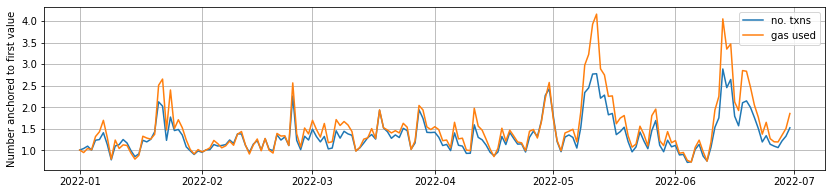

In [13]:
swapIDcounts = []
for swap in df_swap:
    swapID = swap.loc[:, ['date', 'transaction_id']]
    swapID = swapID.groupby('date').count()
    swapIDcounts.append(swapID)
    
swapGAScounts = []
for swap in df_swap:
    swapGAS = swap.loc[:, ['date', 'transaction_gasUsed']]
    swapGAS = swapGAS.groupby('date').sum()
    swapGAScounts.append(swapGAS)
    
ids = swapIDcounts[0]
for i in swapIDcounts[1:]:
    ids = ids.add(i, fill_value=0)
    
gas = swapGAScounts[0]
for g in swapGAScounts[1:]:
    gas = gas.add(g, fill_value=0)
   

"""
    The plot shows how different crowdedness in the environment makes the two lines deviate.
    Not always the same one above the other.
"""

plt.figure(figsize=(14, 3))
plt.plot(list(ids.index), np.array(ids.transaction_id)/np.array(ids.transaction_id)[0], label='no. txns')
plt.plot(list(gas.index), np.array(gas.transaction_gasUsed)/np.array(gas.transaction_gasUsed)[0], label='gas used')
plt.grid()
plt.legend()
plt.ylabel('Number anchored to first value')
plt.savefig("evol-txns-gas", dpi=100, bbox_inches='tight')
plt.show()

In [10]:
print(len(saved_poolsJanJune))

113


In [38]:
dict_swapA = {}
for k in dict_swap.keys():
    if addresses[k] in saved_poolsJanJune:
        temp = dict_swap[k]
        temp['pair_name'] = [k] *len(temp)
        dict_swapA[k] = temp
print(len(dict_swapA))

import pickle
with open('/home/miori/Desktop/bridges/subsets/ehiA.pkl', 'wb') as f:
    pickle.dump(dict_swapA, f)

113


In [45]:
dict_swapB1 = {}
for k in dict_swap.keys():
    if addresses[k] in saved_poolsJanMarch:
        temp = dict_swap[k]
        temp['pair_name'] = [k] *len(temp)
        temp = temp[temp.date >= date(2021, 12, 1)]
        temp = temp[temp.date < date(2022, 4, 1)]
        dict_swapB1[k] = temp
print(len(dict_swapB1))

import pickle
with open('/home/miori/Desktop/bridges/subsets/ehiB1.pkl', 'wb') as f:
    pickle.dump(dict_swapB1, f)
    
dict_swapB2 = {}
for k in dict_swap.keys():
    if addresses[k] in saved_poolsAprJune:
        temp = dict_swap[k]
        temp['pair_name'] = [k] *len(temp)
        temp = temp[temp.date >= date(2022, 4, 1)]
        temp = temp[temp.date < date(2022, 7, 1)]
        dict_swapB2[k] = temp
print(len(dict_swapB2))

import pickle
with open('/home/miori/Desktop/bridges/subsets/ehiB2.pkl', 'wb') as f:
    pickle.dump(dict_swapB2, f)

126
148


In [46]:
dict_swapC1 = {}
for k in dict_swap.keys():
    if addresses[k] in saved_poolsJanFeb:
        temp = dict_swap[k]
        temp['pair_name'] = [k] *len(temp)
        temp = temp[temp.date >= date(2021, 1, 1)]
        temp = temp[temp.date < date(2022, 3, 1)]
        dict_swapC1[k] = temp
print(len(dict_swapC1))

import pickle
with open('/home/miori/Desktop/bridges/subsets/ehiC1.pkl', 'wb') as f:
    pickle.dump(dict_swapC1, f)
    
dict_swapC2 = {}
for k in dict_swap.keys():
    if addresses[k] in saved_poolsMarApr:
        temp = dict_swap[k]
        temp['pair_name'] = [k] *len(temp)
        temp = temp[temp.date >= date(2022, 3, 1)]
        temp = temp[temp.date < date(2022, 5, 1)]
        dict_swapC2[k] = temp
print(len(dict_swapC2))

import pickle
with open('/home/miori/Desktop/bridges/subsets/ehiC2.pkl', 'wb') as f:
    pickle.dump(dict_swapC2, f)
    
dict_swapC3 = {}
for k in dict_swap.keys():
    if addresses[k] in saved_poolsMayJune:
        temp = dict_swap[k]
        temp['pair_name'] = [k] *len(temp)
        temp = temp[temp.date >= date(2022, 5, 1)]
        temp = temp[temp.date < date(2022, 7, 1)]
        dict_swapC3[k] = temp
print(len(dict_swapC3))

import pickle
with open('/home/miori/Desktop/bridges/subsets/ehiC3.pkl', 'wb') as f:
    pickle.dump(dict_swapC3, f)

131
145
155


### Now you really do the further subsetting via the Network Approach

In [15]:
#name = all_pools[0]
#swap = pre_process_swap('/Users/debbie/Desktop/crypto-project/data/allData/'+ name + '_swapdata.pkl')
#path = '/Users/debbie/Desktop/crypto-project/data/LPdata/'+ name + '_LPdata.pkl'
#lp = pd.read_pickle(path)

In [11]:
"""
    Extract the wanted data. Different for different ranges of time.
"""

def wanted_data(ids_, start, end):
    pools_dict_swap = {}
    pools_dict_lp = {}
    origins_swap = {}
    origins_lp = {}
    senders_swap = {}
    senders_lp = {}
    common_origins = {}

    for name in tqdm(ids_):

        data = pools.loc[name, :]
        ids = data.token0_symbol+'-'+data.token1_symbol+'/'+data.feeTier

        path = '/scratch/Debbie_Miori/crypto/swapData/'+ name + '_swapdata.pkl'
        swap = pre_process_swap(path, start, end)
        #swap = swap[swap.date >= start]
        #swap = swap[swap.date < end] 
        swap['pair_name'] = [ids]*len(swap)

        pools_dict_swap[ids] = swap
        origins_swap_list = np.unique(list(swap.origin))
        origins_swap[ids] = origins_swap_list
        senders_swap[ids] = np.unique(list(swap.sender))
        
        path = '/home/miori/Desktop/crypto/LPdata/'+ name + '_LPdata.pkl'
        lp = pd.read_pickle(path)
        lp = lp.drop_duplicates()
        lp['date'] = [date(t.year, t.month, t.day) for t in list(lp.timestamp)]
        lp = lp[lp.date >= start]
        lp = lp[lp.date < end]
        lp['pair_name'] = [ids]*len(lp)

        pools_dict_lp[ids] = lp
        origins_lp_list = np.unique(list(lp.origin))
        origins_lp[ids] = origins_lp_list
        senders_lp[ids] = np.unique(list(lp.sender))
        
        common_origins[ids] = list(set(origins_swap_list) & set(origins_lp_list))
        
    pairs = list(pools_dict_swap.keys())
        
    return pools_dict_swap, origins_swap, senders_swap, pools_dict_lp, origins_lp, senders_lp, common_origins, pairs



In [12]:
ids_ = saved_poolsJanJune
start = date(2022, 1, 1)
end = date(2022, 7, 1)

pools_dict_swapA, origins_swapA, senders_swapA, \
pools_dict_lpA, origins_lpA, senders_lpA, \
common_originsA, pairsA = wanted_data(ids_, start, end)


  0%|          | 0/113 [00:00<?, ?it/s]

In [13]:
len(list(pools_dict_swapA.keys()))

113

In [19]:
with open('/scratch/Debbie_Miori/crypto/initial_pools/initial_poolsA.pkl', 'wb') as f:
    pickle.dump(pools_dict_swapA, f)

In [20]:
look = []
for k in common_originsA.keys():
    look.append(len(common_originsA[k]))
    
print(look)

[1, 14, 9, 226, 0, 2, 226, 17, 19, 293, 0, 1, 0, 1717, 135, 3, 5, 20, 65, 0, 90, 162, 30, 1, 9, 3, 66, 0, 79, 12, 224, 202, 0, 17, 41, 26, 47, 100, 16, 0, 2, 5, 26, 9, 54, 28, 210, 198, 0, 181, 5, 28, 10, 22, 1, 6, 60, 23, 0, 1, 5, 14, 2, 3, 195, 43, 8, 4, 220, 71, 2, 11, 19, 1, 51, 56, 52, 93, 4, 2, 6, 53, 1, 6, 0, 107, 213, 828, 8, 41, 17, 0, 28, 1, 5, 107, 2, 15, 7, 3, 444, 241, 25, 36, 9, 117, 10, 1, 14, 7, 176, 0, 33]


In [21]:
lookRatioLT, lookRatioLP = [], []
for k in common_originsA.keys():
    try:
        lookRatioLT.append(len(common_originsA[k])/len(origins_swapA[k]))
    except:
        lookRatioLT.append(0)
    
    try:
        lookRatioLP.append(len(common_originsA[k])/len(origins_lpA[k]))
    except:
        lookRatioLP.append(0)

In [30]:
all_origins_swapA = []
for k in origins_swapA.keys():
    all_origins_swapA += list(origins_swapA[k])
all_origins_swapA = np.unique(all_origins_swapA)

all_origins_lpA = []
for k in origins_lpA.keys():
    all_origins_lpA += list(origins_lpA[k])
all_origins_lpA = np.unique(all_origins_lpA)

In [31]:
len(all_origins_swapA), len(all_origins_lpA)

(479161, 23952)

In [33]:
len(list(set(all_origins_swapA) & set(all_origins_lpA)))

13640

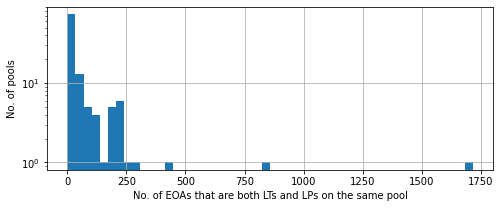

In [22]:
plt.figure(figsize=(8, 3))
plt.hist(look, bins=50)
plt.yscale('log')
plt.grid()
plt.xlabel('No. of EOAs that are both LTs and LPs on the same pool')
plt.ylabel('No. of pools')
plt.show()

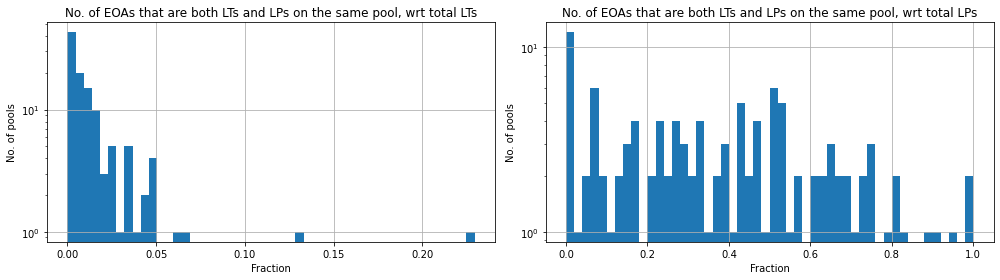

In [23]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.hist(lookRatioLT, bins=50)
plt.yscale('log')
plt.grid()
plt.title('No. of EOAs that are both LTs and LPs on the same pool, wrt total LTs')
plt.xlabel('Fraction')
plt.ylabel('No. of pools')

plt.subplot(122)
plt.hist(lookRatioLP, bins=50)
plt.yscale('log')
plt.grid()
plt.title('No. of EOAs that are both LTs and LPs on the same pool, wrt total LPs')
plt.xlabel('Fraction')
plt.ylabel('No. of pools')

plt.tight_layout()
plt.savefig("/scratch/Debbie_Miori/crypto/commonLT-LP", dpi=100, bbox_inches='tight')
plt.show()

In [34]:
c = list(common_originsA.keys())[lookRatioLT.index(max(lookRatioLT))]
c

'WETH-sETH2/3000'

In [35]:
len(common_originsA[c])

226

In [37]:
len(common_originsA[c])/len(origins_swapA[c]), len(common_originsA[c])/len(origins_lpA[c])

(0.22944162436548224, 0.7313915857605178)

# ------------------------------------------------------

In [14]:
"""
    Extract the number of origins/senders active on both pools of each possible pair
"""

def common_origins_senders(origins, senders, pairs):
    
    # extract the number of origins active on both pools of each possible pair
    common_origins = []
    for p in tqdm(range(len(pairs))):
        o0 = origins[pairs[p]]

        for q in range(p+1, len(pairs)):
            o1 = origins[pairs[q]]
            common = len(list(set(o0) & set(o1)))
            common_origins.append([pairs[p], pairs[q], common])

    # extract the number of senders active on both pools of each possible pair
    common_senders = []
    for p in tqdm(range(len(pairs))):
        s0 = senders[pairs[p]]

        for q in range(p+1, len(pairs)):
            s1 = senders[pairs[q]]
            common = len(list(set(s0) & set(s1)))
            common_senders.append([pairs[p], pairs[q], common])
            
    return common_origins, common_senders

In [15]:
"""
    Function to create a graph of common origins or senders
"""
def graph_S_O_threshold(pairs, links, threshold):

    G = nx.Graph()
    G.add_nodes_from(pairs)

    G.add_weighted_edges_from(
        [(entry[0], entry[1], entry[2]) for entry in links if entry[2] >= threshold],
        weight='weight')

    max_conn = sorted(nx.connected_components(G), key=len, reverse=True)[0]
    size = len(max_conn)
    
    return size


"""
    Plot size of largest connected component for different threshold of minimum weight for links.
"""

def plot_to_decide(pairs, common_origins, common_senders, title):
    # ORIGINS
    thresholdO = np.arange(0, 3500, 200)
    if title == 'LP':
        thresholdO = np.arange(0, 100, 5)
    sizeO = []
    for t in thresholdO:
        sizeO.append(graph_S_O_threshold(pairs, common_origins, t))

    # SENDERS
    thresholdS = np.arange(0, 300, 15)
    if title == 'LP':
        thresholdS = np.arange(0, 15, 1)
    sizeS = []
    for t in thresholdS:
        sizeS.append(graph_S_O_threshold(pairs, common_senders, t))  
        
        
    plt.figure(figsize=(6, 4))
    plt.subplot(211)
    plt.plot(thresholdO, sizeO, label='common origins', color='green')
    plt.scatter(thresholdO, sizeO, color='green')
    plt.xlabel('minimum threshold')
    plt.ylabel('size giant component')
    plt.yticks([0, 25, 50, 75, 100])
    plt.legend()
    plt.grid()
    plt.title(title)

    plt.subplot(212)
    plt.plot(thresholdS, sizeS, label='common senders', color='red')
    plt.scatter(thresholdS, sizeS, color='red')  
    plt.xlabel('minimum threshold')
    plt.ylabel('size giant component')
    plt.yticks([0, 25, 50, 75, 100])
    plt.legend()
    plt.grid()
    plt.title(title)
    
    plt.tight_layout()
    plt.savefig("/scratch/Debbie_Miori/crypto/giant-"+title, dpi=100, bbox_inches='tight')
    plt.show()
        
    return None

# ------------------------------------------------------

In [16]:
#######################################

case = 'A'
ids_ = saved_poolsJanJune
start = date(2022, 1, 1)
end = date(2022, 7, 1)

#######################################

In [3]:
#######################################

case = 'B1'
ids_ = saved_poolsJanMarch
start = date(2022, 1, 1)
end = date(2022, 4, 1)

#######################################

In [35]:
#######################################

case = 'B2'
ids_ = saved_poolsAprJune
start = date(2022, 4, 1)
end = date(2022, 7, 1)

#######################################

In [46]:
#######################################

case = 'C1'
ids_ = saved_poolsJanFeb
start = date(2022, 1, 1)
end = date(2022, 3, 1)

#######################################

In [57]:
#######################################

case = 'C2'
ids_ = saved_poolsMarApr
start = date(2022, 3, 1)
end = date(2022, 5, 1)

#######################################

In [66]:
#######################################

case = 'C3'
ids_ = saved_poolsMayJune
start = date(2022, 5, 1)
end = date(2022, 7, 1)

#######################################

In [4]:
pools_dict_swapA, origins_swapA, senders_swapA, \
pools_dict_lpA, origins_lpA, senders_lpA, \
common_originsA, pairsA = wanted_data(ids_, start, end)

common_origins_swapA, common_senders_swapA = common_origins_senders(origins_swapA, senders_swapA, pairsA)
common_origins_lpA, common_senders_lpA = common_origins_senders(origins_lpA, senders_lpA, pairsA)

NameError: name 'wanted_data' is not defined

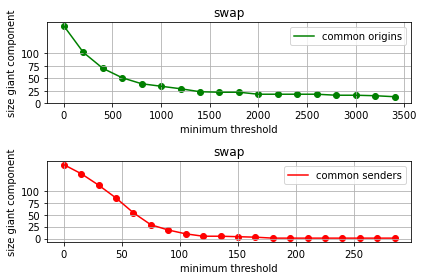

In [68]:
plot_to_decide(pairsA, common_origins_swapA, common_senders_swapA, title='swap')

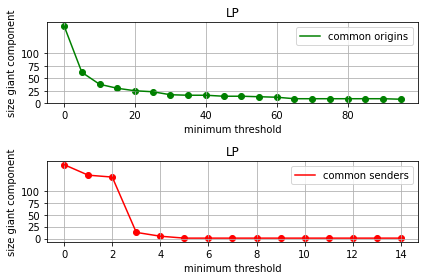

In [69]:
plot_to_decide(pairsA, common_origins_lpA, common_senders_lpA, title='LP')

In [17]:
"""
    Now you define the thresholds and you compute the final pools wanted.
    From the plots, take roughly the tail.
"""

def final_pools(pairs, common_origins, common_senders, thresholdO = 1000, thresholdS = 100):
    
    #ORIGINS
    G = nx.Graph()
    G.add_nodes_from(pairs)
    G.add_weighted_edges_from(
        [(entry[0], entry[1], entry[2]) for entry in common_origins if entry[2] >= thresholdO],
        weight='weight')
    max_conn = sorted(nx.connected_components(G), key=len, reverse=True)[0]
    G_conn = G.subgraph(max_conn).copy()
    GO = G_conn

    #SENDERS
    G = nx.Graph()
    G.add_nodes_from(pairs)
    G.add_weighted_edges_from(
        [(entry[0], entry[1], entry[2]) for entry in common_senders if entry[2] >= thresholdS],
        weight='weight')
    max_conn = sorted(nx.connected_components(G), key=len, reverse=True)[0]
    G_conn = G.subgraph(max_conn).copy()
    GS = G_conn

    #######################################################

    nodes_GO = list(GO.nodes())
    nodes_GS = list(GS.nodes())
    print(len(nodes_GO), len(nodes_GS))

    intersection_GO_GS = list(set(nodes_GO) & set(nodes_GS))
    union_GO_GS = list(set(nodes_GO) | set(nodes_GS))
    print(len(intersection_GO_GS), len(union_GO_GS))
    
    return intersection_GO_GS, union_GO_GS

In [18]:
#######################################
### A
thresholdO_swap = 2_000
thresholdS_swap = 100

thresholdO_lp = 30
thresholdS_lp = 3
#######################################

In [30]:
#######################################
### B1
thresholdO_swap = 1_500
thresholdS_swap = 60

thresholdO_lp = 20
thresholdS_lp = 3
#######################################

In [42]:
#######################################
### B2
thresholdO_swap = 1_500
thresholdS_swap = 80

thresholdO_lp = 15
thresholdS_lp = 3
#######################################

In [53]:
#######################################
### C1
thresholdO_swap = 1_000
thresholdS_swap = 50

thresholdO_lp = 10
thresholdS_lp = 3
#######################################

In [61]:
#######################################
### C2
thresholdO_swap = 1_000
thresholdS_swap = 50

thresholdO_lp = 10
thresholdS_lp = 3
#######################################

In [74]:
#######################################
### C3
thresholdO_swap = 1_000
thresholdS_swap = 75

thresholdO_lp = 10
thresholdS_lp = 3
#######################################

In [75]:
intersection_swapA, union_swapA = final_pools(pairsA, common_origins_swapA, common_senders_swapA, \
                                      thresholdO = thresholdO_swap, thresholdS = thresholdS_swap)

print(intersection_swapA)
print('------------------')
print(set(union_swapA)- set(intersection_swapA))

34 29
24 39
['DAI-WETH/500', 'USDC-USDT/100', 'UST-WETH/3000', 'CEL-WETH/3000', 'WBTC-WETH/3000', 'DAI-USDC/100', 'WETH-USDT/500', 'UNI-WETH/3000', 'APE-WETH/3000', 'LINK-WETH/3000', 'USDC-WETH/3000', 'DAI-WETH/3000', 'HEX-USDC/3000', 'WETH-ENS/3000', 'MATIC-WETH/3000', 'WBTC-WETH/500', 'WBTC-USDC/3000', 'WETH-CRV/10000', 'WETH-USDT/3000', 'WETH-LUNA/10000', 'HEX-WETH/3000', 'WETH-LOOKS/3000', 'SHIB-WETH/3000', 'USDC-WETH/500']
------------------
{'WBTC-USDT/3000', 'GALA-WETH/3000', 'FRAX-USDC/500', 'USDC-WETH/10000', 'SPELL-WETH/3000', 'USDC-USDT/500', 'FEI-USDC/100', 'APE-USDC/3000', 'AAVE-WETH/3000', 'DAI-USDT/500', 'HEX-USDC/10000', 'PAX-WETH/3000', 'HDRN-USDC/10000', 'SNX-WETH/3000', 'MKR-WETH/3000'}


In [76]:
intersection_lpA, union_lpA = final_pools(pairsA, common_origins_lpA, common_senders_lpA, \
                                      thresholdO = thresholdO_lp, thresholdS = thresholdS_lp)

print(intersection_lpA)
print('------------------')
print(set(union_lpA)- set(intersection_lpA))

38 13
11 40
['WBTC-USDT/3000', 'DAI-WETH/500', 'WBTC-USDC/3000', 'USDC-WETH/3000', 'UNI-USDC/3000', 'WETH-USDT/3000', 'WETH-LUNA/10000', 'HEX-USDC/3000', 'HEX-WETH/3000', 'WETH-USDT/500', 'USDC-WETH/500']
------------------
{'LEASH-WETH/10000', 'USDC-USDT/100', 'HDRN-USDC/10000', 'SHIB-WETH/10000', 'WETH-oSQTH/3000', 'gOHM-WETH/10000', 'DAI-USDC/500', 'WBTC-WETH/3000', 'TORN-WETH/10000', 'DAI-USDC/100', 'UNI-WETH/3000', 'APE-WETH/3000', 'LINK-WETH/3000', 'DAI-WETH/3000', 'USDC-WETH/10000', 'WETH-TRU/10000', 'WETH-ENS/3000', 'MATIC-WETH/3000', 'USDC-USDT/500', 'APE-USDC/3000', 'AAVE-WETH/3000', 'SAND-WETH/10000', 'WBTC-WETH/500', 'GALA-WETH/3000', 'WETH-CRV/10000', 'WETH-LOOKS/3000', 'SHIB-WETH/3000', 'HEX-USDC/10000', 'MKR-WETH/3000'}


In [77]:
with open('/scratch/Debbie_Miori/crypto/subsets/'+case+'_swap.pkl', 'wb') as f:
    pickle.dump(intersection_swapA, f)
    
with open('/scratch/Debbie_Miori/crypto/subsets/pools'+case+'_swap.pkl', 'wb') as f:
    pools_dict = {k: v for k, v in pools_dict_swapA.items() if k in intersection_swapA}
    print(len(pools_dict))
    pickle.dump(pools_dict, f)
    
    
with open('/scratch/Debbie_Miori/crypto/subsets/'+case+'_lp.pkl', 'wb') as f:
    pickle.dump(intersection_lpA, f)
    
with open('/scratch/Debbie_Miori/crypto/subsets/pools'+case+'_lp.pkl', 'wb') as f:
    pools_dict = {k: v for k, v in pools_dict_lpA.items() if k in intersection_lpA}
    print(len(pools_dict))
    pickle.dump(pools_dict, f)

24
11


In [78]:
case

'C3'

### ------------------------------------------

In [78]:
#with open('subsets/A.pkl', 'wb') as f:
#    pickle.dump(intersection_swapA, f)
    
#with open('subsets/poolsA.pkl', 'wb') as f:
#    pools_dict = {k: v for k, v in pools_dict_swapA.items() if k in intersection_swapA}
#    print(len(pools_dict))
#    pickle.dump(pools_dict, f)

In [79]:
#pools_dict.keys()

### ------------------------------------------

### Beyond the above, now look at all data together and extract special flows/routing when two actions inside one transaction are two linked swaps that could have been one (bridge). This could give you an insight of important pools for knowledgeable traders/money.

### Some code at this point was run on elixir and now upload the flow (bridge) results.

In [86]:
name_folder = 'A'
start = date(2022, 1, 1)
end = date(2022, 7, 1)

In [5]:
name_folder = 'B1'
start = date(2022, 1, 1)
end = date(2022, 4, 1)

In [29]:
name_folder = 'B2'
start = date(2022, 4, 1)
end = date(2022, 7, 1)

In [47]:
name_folder = 'C1'
start = date(2022, 1, 1)
end = date(2022, 3, 1)

In [65]:
name_folder = 'C2'
start = date(2022, 3, 1)
end = date(2022, 5, 1)

In [83]:
name_folder = 'C3'
start = date(2022, 5, 1)
end = date(2022, 7, 1)

In [84]:
############################################################################################################
############################################################################################################
############################################################################################################

with open('/scratch/Debbie_Miori/crypto/subsets/pools'+name_folder+'_swap.pkl', 'rb') as f:
    pools_dict = pickle.load(f)
pairs = list(pools_dict.keys())
    
with open('/scratch/Debbie_Miori/crypto/subsets/'+name_folder+'_swap.pkl', 'rb') as f:
    intersection_previous = pickle.load(f)
    
with open('/scratch/Debbie_Miori/crypto/save_flows/'+name_folder+'.pickle', 'rb') as f:
    all_f_full = pickle.load(f)
all_f_full = [x for y in all_f_full for x in y]
    
############################################################################################################
############################################################################################################
############################################################################################################

In [85]:
full = pd.concat(list(pools_dict.values()), ignore_index=True).sort_values(by=['timestamp'])

name0, name1, fees = [], [], []
for pair in list(full.pair_name):
    if pair == 'ETH2x-FLI-WETH/3000':
        t0 = 'ETH2x-FLI'
        t1 = 'WETH'
        fee = '3000'
    else:
        two = pair.split('-')
        t0 = two[0]
        t1 = two[1]
        t1, fee = t1.split('/')
    name0.append(t0)
    name1.append(t1)
    fees.append(fee)
    
full['name0'] = name0
full['name1'] = name1
full['feeTier'] = fees

actions_for_txn = full.groupby('transaction_id').count().sort_values(by=['id'], ascending=False)
# save only the txns that did at least 2 actions. Only 1 cannot tell us anything about flows
txns_of_interest = list(actions_for_txn[actions_for_txn.id>=2].index)

full.head()

,id,timestamp,amount0,amount1,executionPrice,poolPrice,amountUSD,tick,sqrtPriceX96,sender,...,transaction_id,transaction_blockNumber,transaction_timestamp,transaction_gasUsed,transaction_gasPrice,date,pair_name,name0,name1,feeTier
543306,0x6cf94aa8ac8be22851cbadd184a6cdb122a7501ba93e...,2022-05-01 00:00:07,1.975178,-2567.408407,0.000769,7.620855e+08,5507.79608651435707463387128123314,71798,2869972422349787340031480639558,0xdef1c0ded9bec7f1a1670819833240f027b25eff,...,0x6cf94aa8ac8be22851cbadd184a6cdb122a7501ba93e...,14688369,1651359607,308574.0,4.640995e+10,2022-05-01,WETH-CRV/10000,WETH,CRV,10000
1022233,0x78d1cfa55e242b554df56aa715760732c2e2d230d16c...,2022-05-01 00:00:07,-610.000000,4.412365,138.247869,1.386475e+14,12303.90796340672565836074256311676,-49322,6728582052679446183025144436,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,...,0x78d1cfa55e242b554df56aa715760732c2e2d230d16c...,14688369,1651359607,182288.0,4.640995e+10,2022-05-01,APE-WETH/3000,APE,WETH,3000
1022232,0x8e32aaca48e9dccb867b50d796a70428e186c969dc47...,2022-05-01 00:00:07,58.401097,-0.419862,139.095944,1.386802e+14,1170.787901932082250391569432322257,-49325,6727788438382578296063829153,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,...,0x8e32aaca48e9dccb867b50d796a70428e186c969dc47...,14688369,1651359607,179896.0,4.640995e+10,2022-05-01,APE-WETH/3000,APE,WETH,3000
1121723,0x48d425e52efc53c73d68721380b252eb94fb340a7cfc...,2022-05-01 00:00:07,-0.990862,13.618793,0.072757,7.279020e+00,37935.11330089512776260302057734343,256473,29365887898228011143114728085848553,0x4cb18386e5d1f34dc6eea834bf3534a970a3f8e7,...,0x48d425e52efc53c73d68721380b252eb94fb340a7cfc...,14688369,1651359607,900000.0,4.656145e+10,2022-05-01,WBTC-WETH/500,WBTC,WETH,500
30807,0xc8fffaf8809dd895fa838366930b4afa50d14e164c27...,2022-05-01 00:00:07,100.000000,-0.035932,2783.068815,2.781677e+03,100.0976950689733646153745735254527,197011,1502194600523982215624219054592555,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,...,0xc8fffaf8809dd895fa838366930b4afa50d14e164c27...,14688369,1651359607,261426.0,4.640995e+10,2022-05-01,USDC-WETH/500,USDC,WETH,500


In [86]:
# difficult to follow the exact money.
# Approximation: just count buy/sell and match that if for an action the opposite sign is still "available"

# also, take the sign because difficult to compare the amount of different cryptos

def flows_in_txn(temp):
    
    tokens = list(set(temp.name0) | set(temp.name1))
    balance = dict(zip(tokens, np.zeros(len(tokens))))
    balance =  dict(zip(tokens, [[]]*len(tokens)))
    save_mid = []
    pools_considered =  dict(zip(tokens, [[]]*len(tokens)))

    look = dict(zip(tokens, [[]]*len(tokens)))

    for r in range(len(temp)):
        row = temp.iloc[r, :]
        n0 = row.name0
        n1 = row.name1

        a0 = np.sign(float(row.amount0))
        a1 = np.sign(float(row.amount1))

        pair = row.pair_name

        save = pools_considered[n0].copy()
        save += [pair]
        pools_considered[n0] = save

        save = pools_considered[n1].copy()
        save += [pair]
        pools_considered[n1] = save

        save = balance[n0].copy() 
        save += [a0]
        balance[n0] = save

        save = balance[n1].copy() 
        save += [a1]
        balance[n1] = save
    
    
        """
            I need to find when the thing that now goes to zero became first non-zero.
            Use this bridges are the things that tell me where the money goes!!!
        """

        try:
            if balance[n0][-2] == -1 and  balance[n0][-1] == +1:
                save_mid.append((n0, pair))

                save = look[n0].copy() 
                save += [len(balance[n0])-1]
                look[n0] = save

            if balance[n1][-2] == -1 and  balance[n1][-1] == +1:
                save_mid.append((n1, pair))

                save = look[n1].copy() 
                save += [len(balance[n1])-1]
                look[n1] = save
        except:
            None
        
    #balance[n0] += a0
    #balance[n1] += a1
    
#print(balance, save_mid)

    flows = []
    if len(save_mid) > 0:
        for c in range(len(save_mid)):
            curr = save_mid[c]
            idx = look[curr[0]][0]
            flow = [pools_considered[curr[0]][idx-1], pools_considered[curr[0]][idx]]

            flows.append(flow)
            
    return flows

# difficult to follow the exact money.
# Approximation: just count buy/sell and match that if for an action the opposite sign is still "available"

# also, take the sign because difficult to compare the amount of different cryptos

def flows_(txns):
    f = []
    for t in txns:
        
        temp = full[full.transaction_id == t]
        temp.loc[:, 'logIndex'] = [float(l) for l in list(temp.loc[:, 'logIndex'])]
        temp = temp.sort_values('logIndex')
        
        f += flows_in_txn(temp)
    return f

In [87]:
### We need to assume one jump maximum in this case.

#for t in tqdm(txns_of_interest[100:101]):
"""
all_flows = []
count = 0
counts = []
for t in tqdm(txns_of_interest):
    temp = full[full.transaction_id == t]
    temp.loc[:, 'logIndex'] = [float(l) for l in list(temp.loc[:, 'logIndex'])]
    temp = temp.sort_values('logIndex')
    
    flows = flows_in_txn(temp)
    all_flows += flows
    
    count += 1
    
    # save every 1000
    if count % 1000 == 0 or count == len(txns_of_interest):
        with open('save_flows/'+name_folder+'/'+str(count)+'.pickle', 'wb') as handle:
            pickle.dump(all_flows, handle)
        
        counts.append(count)
        #print(all_flows)
        all_flows = []
"""
########################


"""
    Here we upload all the flows found
"""
"""

all_f = []
for count in counts:
    with open('save_flows/'+name_folder+'/'+str(count)+'.pickle', 'rb') as handle:
        all_f += pickle.load(handle)
"""

all_f = all_f_full
        
ind = list(set([(a, b) for a, b in all_f]))
print(len(ind))

balance = dict(zip(ind, np.zeros(len(ind))))
for f in tqdm(all_f):
    balance[(f[0], f[1])] += 1

1406


  0%|          | 0/80967 [00:00<?, ?it/s]

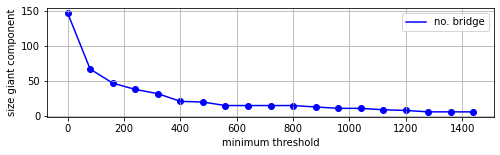

In [88]:
# probably always threshold 50

def graph_B_threshold(pairs, balance, threshold):

    G = nx.Graph()
    G.add_nodes_from(pairs)

    G.add_weighted_edges_from(
        [(a, b, balance[(a, b)]) for a, b in list(balance.keys()) if balance[(a, b)] >= threshold],
        weight='weight')

    max_conn = sorted(nx.connected_components(G), key=len, reverse=True)[0]
    size = len(max_conn)
    
    return size

# bridges
thresholdB = np.arange(0, 1_500, 80)
sizeB = []
for t in thresholdB:
    sizeB.append(graph_B_threshold(pairs, balance, t))
    
plt.figure(figsize=(8, 2))
plt.plot(thresholdB, sizeB, label='no. bridge', color='blue')
plt.scatter(thresholdB, sizeB, color='blue')
plt.xlabel('minimum threshold')
plt.ylabel('size giant component')
#plt.yticks([0, 25, 50, 75, 100])
plt.legend()
plt.grid()
#plt.savefig("threshold-B", dpi=100, bbox_inches='tight')
plt.show()

In [89]:
###################

threshold = 800 # A
threshold = 600 # B1

threshold = 400 # C1
threshold = 500 # C2
threshold = 500 # C3

threshold = 600 # B2

###################

In [90]:
threshold = 500

In [91]:
# create the actual graph


#G = nx.DiGraph()
G = nx.Graph()

G.add_nodes_from(pairs)
print('nodes added')

G.add_weighted_edges_from(
    [(a, b, balance[(a, b)]) for a, b in list(balance.keys()) if balance[(a, b)] >= threshold],
    weight='weight')

max_conn = sorted(nx.connected_components(G), key=len, reverse=True)[0]
print([len(i) for i in sorted(nx.connected_components(G), key=len, reverse=True)])
print('len connected component', len(max_conn))
G_conn = G.subgraph(max_conn).copy()

G = G_conn

################# FINAL DECISION OF POOLS
intersection_previous = intersection_previous
to_keep = list(set(intersection_previous) | set(list(G.nodes())))
print(len(intersection_previous), len(to_keep), to_keep)

nodes added
[18, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
len connected component 18
24 30 ['WETH-USDT/500', 'USDC-WETH/3000', 'WETH-ENS/3000', 'APE-WETH/3000', 'DAI-USDC/100', 'USDC-WETH/500', 'FRAX-USDC/500', 'SHIB-WETH/3000', 'APE-USDC/3000', 'WETH-LOOKS/3000', 'CEL-WETH/3000', 'HEX-USDC/3000', 'WBTC-WETH/3000', 'UNI-WETH/3000', 'FEI-USDC/100', 'HDRN-USDC/10000', 'DAI-WETH/3000', 'WBTC-WETH/500', 'UST-WETH/3000', 'HEX-WETH/3000', 'DAI-WETH/500', 'WETH-CRV/10000', 'USDC-USDT/500', 'WETH-LUNA/10000', 'LINK-WETH/3000', 'WETH-USDT/3000', 'WBTC-USDC/3000', 'BUSD-USDC/500', 'USDC-USDT/100', 'MATIC-WETH/3000']


In [92]:
# create the actual graph


#G = nx.DiGraph()
G = nx.Graph()

G.add_nodes_from(pairs)
print('nodes added')

G.add_weighted_edges_from(
    [(a, b, balance[(a, b)]) for a, b in list(balance.keys()) if balance[(a, b)] >= threshold],
    weight='weight')

max_conn = sorted(nx.connected_components(G), key=len, reverse=True)[0]
print([len(i) for i in sorted(nx.connected_components(G), key=len, reverse=True)])
print('len connected component', len(max_conn))
G_conn = G.subgraph(max_conn).copy()

G = G_conn

################# FINAL DECISION OF POOLS
intersection_previous = intersection_previous
to_keep = list(set(intersection_previous) | set(list(G.nodes())))
print(len(intersection_previous), len(to_keep), to_keep)

nodes added
[18, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
len connected component 18
24 30 ['WETH-USDT/500', 'USDC-WETH/3000', 'WETH-ENS/3000', 'APE-WETH/3000', 'DAI-USDC/100', 'USDC-WETH/500', 'FRAX-USDC/500', 'SHIB-WETH/3000', 'APE-USDC/3000', 'WETH-LOOKS/3000', 'CEL-WETH/3000', 'HEX-USDC/3000', 'WBTC-WETH/3000', 'UNI-WETH/3000', 'FEI-USDC/100', 'HDRN-USDC/10000', 'DAI-WETH/3000', 'WBTC-WETH/500', 'UST-WETH/3000', 'HEX-WETH/3000', 'DAI-WETH/500', 'WETH-CRV/10000', 'USDC-USDT/500', 'WETH-LUNA/10000', 'LINK-WETH/3000', 'WETH-USDT/3000', 'WBTC-USDC/3000', 'BUSD-USDC/500', 'USDC-USDT/100', 'MATIC-WETH/3000']


In [93]:
set(to_keep) - set(intersection_previous)

{'APE-USDC/3000',
 'BUSD-USDC/500',
 'FEI-USDC/100',
 'FRAX-USDC/500',
 'HDRN-USDC/10000',
 'USDC-USDT/500'}

nodes added


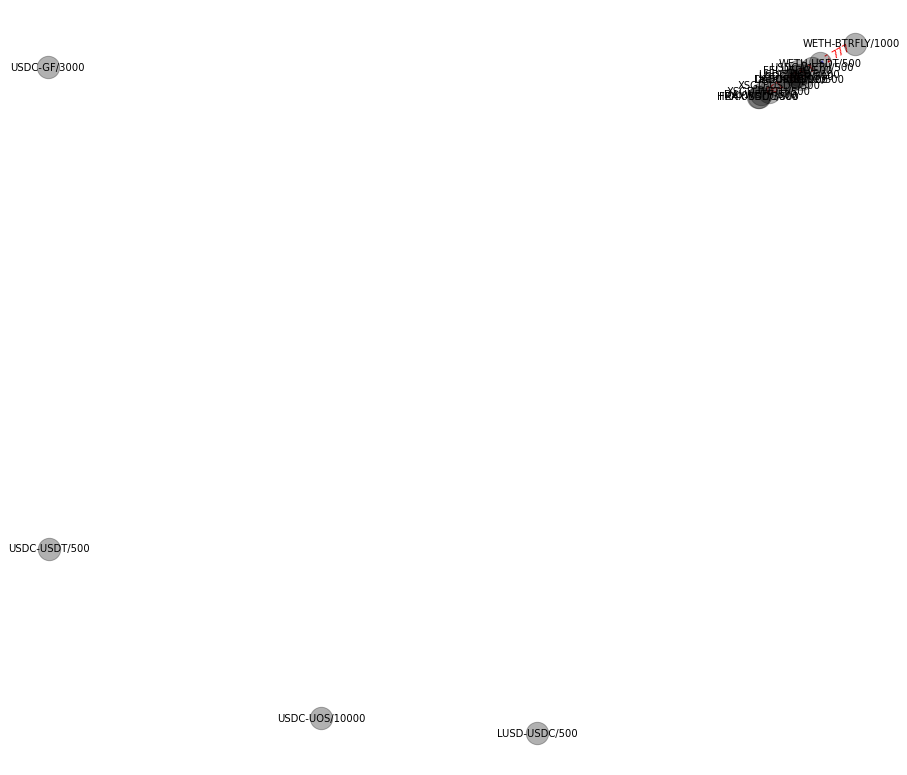

In [57]:
nodes_conn = list(G.nodes())
threshold = 600
G = nx.DiGraph()

G.add_nodes_from(nodes_conn)
print('nodes added')

G.add_weighted_edges_from(
    [(a, b, int(balance[(a, b)])) for a, b in list(balance.keys()) if (a in nodes_conn) & (b in nodes_conn) & (balance[(a, b)] >= threshold)],
    weight='weight')

widths = nx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()

plt.figure(figsize=(16,14))
pos = nx.spring_layout(G, seed=17)
#pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, seed=0)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=500,
                       node_color='black',
                       alpha=0.3)

max_weight = max(np.array(list(widths.values())))

nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=6*np.array(list(widths.values()))/max_weight,
                       edge_color='blue',
                       alpha=0.6
                       #, connectionstyle='arc3, rad = 0.1'
                      )
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black',
                       font_size=10)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=widths,
    label_pos=0.4,
    font_color='red'
)


plt.box(False)
#plt.title('No. of Bridge actions')
plt.savefig("/scratch/Debbie_Miori/crypto/network-bridges-A.png", dpi=100, bbox_inches='tight')
plt.show()

In [101]:
centrality = nx.eigenvector_centrality(G)
df_centr = pd.DataFrame.from_dict({k: v for k, v in sorted(centrality.items(), 
                                                           key=lambda item: item[1], reverse=True)}, orient='index')
df_centr.columns = ['eig-centrality']
df_centr = df_centr.iloc[:10, :]

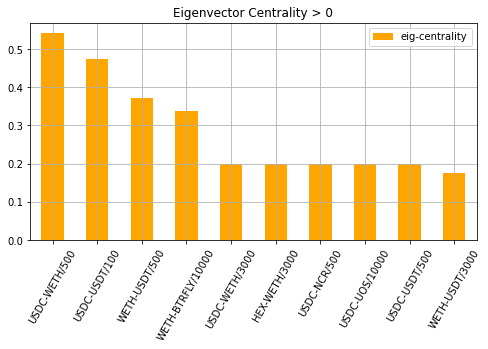

In [106]:
ax = df_centr.plot.bar(y='eig-centrality', rot=60, figsize=(8,4), color='orange')
plt.grid()
plt.title('Eigenvector Centrality > 0')
plt.savefig("/scratch/Debbie_Miori/crypto/eig-centr-A.png", dpi=100, bbox_inches='tight')
plt.show()

In [107]:
###################################

In [94]:
pools

,feeTier,sqrtPrice,token0Price,token1Price,volumeToken0,volumeToken1,volumeUSD,txCount,liquidity,totalValueLockedToken0,...,token0_name,token0_decimals,token0_poolCount,token0_totalValueLockedUSD,token1_id,token1_symbol,token1_name,token1_decimals,token1_poolCount,token1_totalValueLockedUSD
id,,,,,,,,,,,,,,,,,,,,,
0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,500,7.920604e+22,1.000559e+00,9.994416e-01,4.931671e+08,4.931932e+08,4.931933e+08,12808.0,1.119287e+22,2.495320e+07,...,Binance USD,18,0,2.657891e+07,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,USD Coin,6,0,8.996516e+08
0x020c349a0541d76c16f501abc6b2e9c98adae892,10000,5.937884e+34,1.780311e+00,5.616997e-01,9.010528e+07,2.657561e+07,9.014392e+07,9271.0,1.047660e+17,1.193480e+06,...,USD Coin,6,0,8.996516e+08,0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f,SNX,Synthetix Network Token,18,0,1.843754e+06
0x04916039b1f59d9745bf6e0a21f191d1e0a84287,3000,1.742898e+29,2.066403e-01,4.839326e+00,1.059509e+04,1.042006e+05,3.092450e+08,18413.0,4.347989e+19,2.890096e+01,...,yearn.finance,18,0,2.931850e+05,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,Wrapped Ether,18,0,7.696633e+08
0x04a2004b2032fef2ba93f40b0e34d26ab7b00120,3000,1.694542e+35,2.186021e-01,4.574520e+00,3.172780e+07,1.674339e+08,3.172780e+07,3598.0,1.338763e+19,5.180685e+06,...,USD Coin,6,0,8.996516e+08,0xf1ca9cb74685755965c7458528a36934df52a3ef,AVINOC,AVINOC Token,18,0,1.598447e+07
0x04ca0c71eec16fd4fa9d35ac924cc33eeb4187a2,3000,1.461447e+48,2.938957e-39,3.402568e+38,5.364801e+04,8.644398e+08,1.528804e+08,34812.0,0.000000e+00,8.020706e+01,...,Wrapped Ether,18,0,7.696633e+08,0xd5d86fc8d5c0ea1ac1ac5dfab6e529c9967a45e9,WRLD,NFT Worlds,18,0,1.702876e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xfcfdfc98062d13a11cec48c44e4613eb26a34293,10000,1.142418e+31,4.809598e-05,2.079176e+04,3.585520e+04,1.003297e+08,1.205201e+08,7943.0,1.477022e+21,1.883926e+02,...,Wrapped Ether,18,0,7.696633e+08,0xdef1ca1fb7fbcdc777520aa7f396b4e015f497ab,COW,CoW Protocol Token,18,0,7.508814e+04
0xfd76be67fff3bac84e3d5444167bbc018f5968b6,10000,4.281038e+30,3.425003e-04,2.919705e+03,1.109093e+05,1.182749e+08,3.677468e+08,31873.0,2.266698e+22,5.580465e+02,...,Wrapped Ether,18,0,7.696633e+08,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff,IMX,Immutable X,18,0,4.570187e+05
0xfebf38b1d34818d4827034f97b7d6d77c79d4997,3000,5.765048e+25,1.888658e+06,5.294765e-07,1.008855e+11,2.851067e+05,1.045950e+09,51621.0,2.082946e+23,2.593927e+08,...,Spell Token,18,0,1.952454e+05,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,Wrapped Ether,18,0,7.696633e+08


In [95]:
"""
    Save the IDs of the pools you want
"""
pools = pools.reset_index()
ids_keep = {}
for pair in to_keep:
    t0, t1 = pair.split('-')
    t1, fee = t1.split('/')
    ids_keep[pair] = list(pools[(pools.token0_symbol==t0)
                                &(pools.token1_symbol==t1)
                                &(pools.feeTier==fee)].id)[0]
ids_keep

{'WETH-USDT/500': '0x11b815efb8f581194ae79006d24e0d814b7697f6',
 'USDC-WETH/3000': '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8',
 'WETH-ENS/3000': '0x92560c178ce069cc014138ed3c2f5221ba71f58a',
 'APE-WETH/3000': '0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf',
 'DAI-USDC/100': '0x5777d92f208679db4b9778590fa3cab3ac9e2168',
 'USDC-WETH/500': '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640',
 'FRAX-USDC/500': '0xc63b0708e2f7e69cb8a1df0e1389a98c35a76d52',
 'SHIB-WETH/3000': '0x2f62f2b4c5fcd7570a709dec05d68ea19c82a9ec',
 'APE-USDC/3000': '0xb07fe2f407f971125d4eb1977f8acee8846c7324',
 'WETH-LOOKS/3000': '0x4b5ab61593a2401b1075b90c04cbcdd3f87ce011',
 'CEL-WETH/3000': '0x06729eb2424da47898f935267bd4a62940de5105',
 'HEX-USDC/3000': '0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5',
 'WBTC-WETH/3000': '0xcbcdf9626bc03e24f779434178a73a0b4bad62ed',
 'UNI-WETH/3000': '0x1d42064fc4beb5f8aaf85f4617ae8b3b5b8bd801',
 'FEI-USDC/100': '0xdf50fbde8180c8785842c8e316ebe06f542d3443',
 'HDRN-USDC/10000': '0xe859041c9c6d70

In [96]:
pools = pools.set_index('id')

In [97]:
files = all_pools

final_swaps = {}
for n, l in ids_keep.items():
    for f, file in enumerate(files):
        if l in file:
            two = n.split('-')
            t0 = two[0]
            t1 = two[1]
            t1, fee = t1.split('/')
        
            path = '/scratch/Debbie_Miori/crypto/swapData/'+ l + '_swapdata.pkl'
            swap = pre_process_swap(path, start, end)
            temp = swap
            temp['token0'] = [t0]*len(temp)
            temp['token1'] = [t1]*len(temp)
            temp['feeTier'] = [fee]*len(temp)
            
            final_swaps[n] = temp

In [98]:
len(final_swaps)

30

In [99]:
name_folder

'C3'

In [100]:
with open('/scratch/Debbie_Miori/crypto/final_pools_SWAP_time/final_pools'+name_folder+'.pkl', 'wb') as f:
    pickle.dump(final_swaps, f)

In [114]:
final_swaps

{'DAI-WETH/3000':                                                           id  \
 swapIndex                                                      
 89863      0xc0d5cf7c8561286c8c2e21ab3c8258cd6fb288628e17...   
 89864      0x9ab2a5c86cff134487595706dccaec106f3d14c12747...   
 89865      0x908c76f7ba93d2874ce08e9c95dd43477e2172a4c0cb...   
 89866      0xc7e4fd978978bd49d8dd1fd21c91cae94869fb9cf6d1...   
 89867      0xb57c7512a17026a88a6c8e3ede521546151cbf17e5c8...   
 ...                                                      ...   
 133807     0xb42f7d942d818b8cebfb89b9672fe37b1be9bab76001...   
 133808     0xf0725c8093e43b9bb44a2617a3f7b92a6dae1c5c1799...   
 133809     0x40d5241baf9bf5b3427dcc103f15733ac11b4c6474a2...   
 133810     0xbb6e1154e36afb5282894666dfaa3463a9ab167929d6...   
 133811     0xabfb3d3ea1f48d89ae4630fcc07018801720122fdaa7...   
 
                     timestamp       amount0    amount1  executionPrice  \
 swapIndex                                                   

In [115]:
lists = []
#for name in ['A', 'B1', 'B2', 'C1', 'C2', 'C3']:
for name in ['A']:
    with open('/scratch/Debbie_Miori/crypto/final_pools_SWAP_time/final_pools'+name+'.pkl', 'rb') as f:
        p = pickle.load(f)
        lists += list(p.keys())

In [116]:
tokens = []
for l in lists:
    a, b = l.split('-')
    b = b.split('/')[0]
    tokens += [a, b]

In [117]:
token_final = np.unique(tokens)
print(len(token_final), token_final)

22 ['BTRFLY' 'CEL' 'CRV' 'DAI' 'DYDX' 'ENS' 'FRAX' 'FXS' 'GALA' 'HEX' 'LINK'
 'LUSD' 'MATIC' 'NCR' 'SHIB' 'SPELL' 'UNI' 'UOS' 'USDC' 'USDT' 'WBTC'
 'WETH']


In [118]:
lists = []
#for name in ['A', 'B1', 'B2', 'C1', 'C2', 'C3']:
for name in ['A']:
    with open('/scratch/Debbie_Miori/crypto/subsets/'+name+'_lp.pkl', 'rb') as f:
        p = pickle.load(f)
        lists += list(p)
        
tokens = []
for l in lists:
    a, b = l.split('-')
    b = b.split('/')[0]
    tokens += [a, b]

In [119]:
token_final = np.unique(tokens)
print(len(token_final), token_final)

12 ['CRV' 'DAI' 'ENS' 'LINK' 'MATIC' 'MKR' 'SHIB' 'UNI' 'USDC' 'USDT' 'WBTC'
 'WETH']


### Quick look simple distributions for period A over pools

In [11]:
with open('/scratch/Debbie_Miori/crypto/final_pools_SWAP_time/final_poolsA.pkl', 'rb') as f:
    swaps = list(pickle.load(f).values())
    
origins, senders, recipients = [], [], []
comm_os, comm_or, comm_sr = [], [], []
for swap in tqdm(swaps):
    origin = np.unique(list(swap.origin))
    sender = np.unique(list(swap.sender))
    recipient = np.unique(list(swap.recipient))
    
    origins.append(len(origin))
    senders.append(len(sender))
    recipients.append(len(recipient))
    
    comm_os.append(len(list(set(origin)&set(sender))))
    comm_or.append(len(list(set(origin)&set(recipient))))
    comm_sr.append(len(list(set(sender)&set(recipient))))
    
df_SWAPS = pd.DataFrame(np.array([origins, senders, recipients, comm_os, comm_or, comm_sr]).T,
                  columns=['no. O', 'no. S', 'no. R', 'O&S', 'O&R', 'S&R'])

  0%|          | 0/34 [00:00<?, ?it/s]

In [12]:
with open('/scratch/Debbie_Miori/crypto/subsets/poolsA_lp.pkl', 'rb') as f:
    lps = list(pickle.load(f).values())
    
origins, senders, recipients = [], [], []
comm_os, comm_or, comm_sr = [], [], []
for lp in tqdm(lps):
    origin = np.unique(list(lp.origin))
    sender = np.unique(list(lp.sender))
    #recipient = np.unique(list(lp.recipient))
    
    origins.append(len(origin))
    senders.append(len(sender))
    #recipients.append(len(recipient))
    
    comm_os.append(len(list(set(origin)&set(sender))))
    #comm_or.append(len(list(set(origin)&set(recipient))))
    #comm_sr.append(len(list(set(sender)&set(recipient))))
    
df_LPS = pd.DataFrame(np.array([origins, senders, comm_os]).T,
                  columns=['no. O', 'no. S', 'O&S'])

  0%|          | 0/19 [00:00<?, ?it/s]

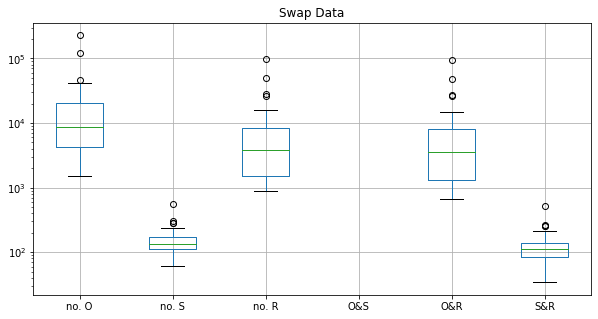

In [13]:
plt.figure(figsize=(10, 5))
boxplot = df_SWAPS.boxplot(column=['no. O', 'no. S', 'no. R', 'O&S', 'O&R', 'S&R'])  
plt.yscale('log')
#plt.yticks([10**0, 10**1, 10**2, 10**3, 10**4, 10**5])
plt.title('Swap Data')
#plt.savefig("/scratch/Debbie_Miori/crypto/O&S&R", dpi=100, bbox_inches='tight')
plt.show()

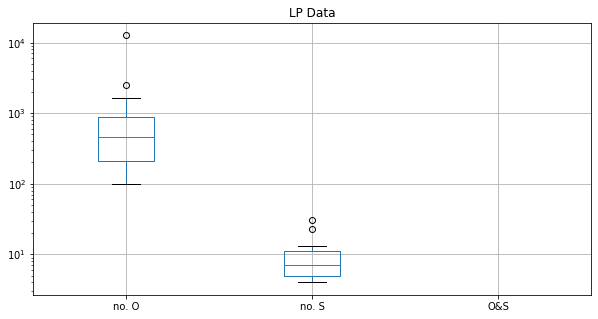

In [14]:
plt.figure(figsize=(10, 5))
boxplot = df_LPS.boxplot(column=['no. O', 'no. S', 'O&S'])  
plt.yscale('log')
#plt.yticks([10**0, 10**1, 10**2, 10**3, 10**4, 10**5])
plt.title('LP Data')
#plt.savefig("O&S&R", dpi=100, bbox_inches='tight')
plt.show()

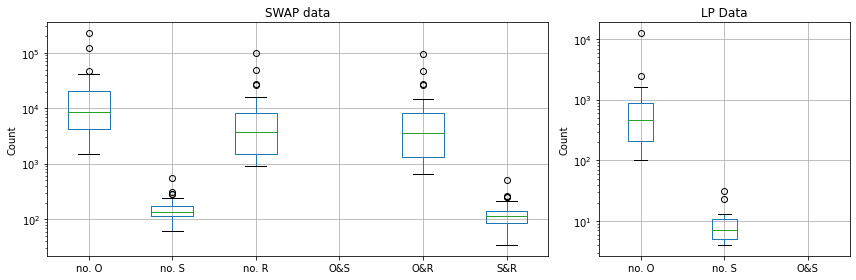

In [16]:
f, (a0, a1) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]})
plt.subplot(121)
boxplot = df_SWAPS.boxplot(column=['no. O', 'no. S', 'no. R', 'O&S', 'O&R', 'S&R'])  
plt.yscale('log')
plt.ylabel('Count')
plt.title('SWAP data')

#plt.figure(figsize=(10, 3))
plt.subplot(122)
boxplot = df_LPS.boxplot(column=['no. O', 'no. S', 'O&S'])  
plt.yscale('log')
plt.title('LP Data') 
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("/scratch/Debbie_Miori/crypto/O-S-R.png", dpi=100, bbox_inches='tight')
plt.show()